In [1]:
from utils2 import *

In [2]:
%load_ext cython
%load_ext rpy2.ipython


In [3]:
%%R

require(ggplot2)
install.packages("devtools")
library("devtools")
install_github("bdsegal/fastPerm")

library(fastPerm)

R[write to console]: Loading required package: ggplot2

R[write to console]: Installing package into ‘/home/ekvall/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/devtools_2.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 375227 bytes (366 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [4]:
%%R

install.packages("coin")

install.packages("ggplot2")

install.packages("perm")

install.packages("exactRankTests")


library(ggplot2)

R[write to console]: Installing package into ‘/home/ekvall/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/coin_1.3-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1263884 bytes (1.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

In [5]:
%%R
    runCoin <- function(x,y,output,n_samples) {
       e <- list(mode="vector",length=n_samples)
        for (i in 1:n_samples) {
            
            DV <- c(x[[i]], y[[i]])
            IV <- factor(rep(c("A", "B"), c(length(x[[i]]), length(y[[i]]))))
            library(coin)                    # for oneway_test(), pvalue()
            output[[i]] <- pvalue(oneway_test(DV ~ IV, 
                   distribution="exact"))
      
            
      
            
            }
    

    return(output)
        
    }

In [6]:
def coin(A,B):
    x = pd.DataFrame(A, columns=list(range(A.shape[1]))).T
    y = pd.DataFrame(B, columns=list(range(B.shape[1]))).T
    n_samples = x.shape[1]
    outputDf = pd.DataFrame(n_samples * [0], columns=["output"]).T
    
    %R -i x
    %R -i y
    %R -i outputDf
    %R -i n_samples
    
    
    %R out <- runCoin(x,y, outputDf, n_samples)
    
    
    %R -o out
    return list(out.T["output"].values)

def runCoin(X_list, y_list):
    pfp_list = list()
    TIME = list()
    
    for Xp, yp in zip(X_list, y_list):

        p_fp = list()
        time_list = list()
        
        for x, y in zip(Xp, yp):
           
            start = time.time()
            p_fp.append(coin(np.array(y)[np.newaxis,...], np.array(x)[np.newaxis,...]))
            end = time.time()
        
            time_list.append(end - start)
        
        pfp_list.append(p_fp)
        TIME.append(time_list)
        
    return pfp_list, TIME

In [7]:
%%R
    runFastPerm <- function(x,y,output, n_samples) {
        e <- list(mode="vector",length=n_samples)
        for (i in 1:n_samples) {
      
            mStopDiffMean(x[[i]], y[[i]])
            valX = fastPerm(x[[i]], y[[i]], testStat = diffMean)
            
            valX <-unlist(valX)

      
            output[[i]] <- as.numeric(valX[1])
      
            }
    

    return(output)


    }

In [8]:
def fastPerm(A,B):
    x = pd.DataFrame(A, columns=list(range(A.shape[1]))).T
    y = pd.DataFrame(B, columns=list(range(B.shape[1]))).T
    n_samples = x.shape[1]
    outputDf = pd.DataFrame(n_samples * [0], columns=["output"]).T
    
    %R -i x
    %R -i y
    %R -i outputDf
    %R -i n_samples
    
    
    %R out <- runFastPerm(x,y, outputDf, n_samples)
    
    
    %R -o out
    return list(out.T["output"].values)

def runFastPerm(X_list, y_list):
    pfp_list = list()
    TIME = list()
    
    for Xp, yp in zip(X_list, y_list):

        p_fp = list()
        time_list = list()
        
        for x, y in zip(Xp, yp):
           
            start = time.time()
            p_fp.append(fastPerm(np.array(y)[np.newaxis,...], np.array(x)[np.newaxis,...]))
            end = time.time()
        
            time_list.append(end - start)
        
        pfp_list.append(p_fp)
        TIME.append(time_list)
        
    return pfp_list, TIME

In [9]:
def getPATH(path, suffix, prefix):
    return path + '/'+ suffix + '_' + prefix + ".png"

In [10]:
path = "figures/GreenVsFastperm"

In [11]:

sampleShape = [2,4,6,8,10,12,14,16,18,20]

In [12]:
mean =0.2

# Sample from $X \sim N(5.0,1)$ and $Y\sim N(5.2,1)$

In [13]:
X_list5_2,y_list5_2= getAllSynthticData(sampleShape, mean, 50)

In [14]:

pt_list5_2, pe_list5_2, parallel_TIME = shiftMethod(np.asarray(X_list5_2), np.asarray(y_list5_2), 40)

In [15]:

p_val_list5_2, TIME_MC5_2 = runFastPerm(np.asarray(X_list5_2), np.asarray(y_list5_2))

In [16]:
singleT_pt_list5_2, singleT_pe_list5_2, singleThreadTime = shiftMethod(np.asarray(X_list5_2), np.asarray(y_list5_2), 40, False)

In [17]:
p_val_list5_2_coin, TIME_coin_2 = runCoin(np.asarray(X_list5_2), np.asarray(y_list5_2))

R[write to console]: Loading required package: survival



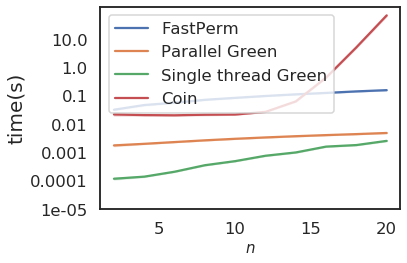

In [20]:
timePlotSNSFastpermCoinFastPerm(np.log10(parallel_TIME), np.log10(TIME_MC5_2),np.log10(singleThreadTime), np.log10(TIME_coin_2), 
            sampleShape, path=getPATH(path, str(mean),"SNSruntimeLogSingleThreadCoinLog"),log=True)

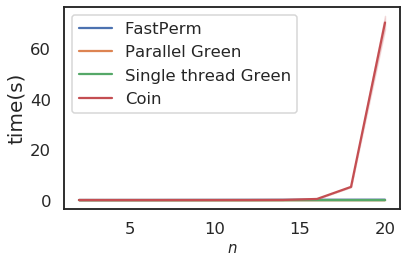

In [21]:
timePlotSNSFastpermCoinFastPerm(parallel_TIME, TIME_MC5_2, singleThreadTime, TIME_coin_2, 
            sampleShape, path=getPATH(path, str(mean),"SNSruntimeLogSingleThreadCoin"),log=False)